In [1]:
# Taarak Shah
# Stat 8051 project

# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
# calculate gini
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]
    # sort rows on prediction column
    # (from largest to smalwrlest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:,0].argsort()][::-1,0]
    pred_order = arr[arr[:,1].argsort()][::-1,0]
    # get Lorenz curves
    L_true = np.cumsum(true_order) / np.sum(true_order)
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    L_ones = np.linspace(1/n_samples, 1, n_samples)
    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)
    # normalize to true Gini coefficient
    return G_pred/G_true

In [10]:
# read in with pandas
train = pd.read_csv('trainsub.csv', index_col=0)
val = pd.read_csv('val.csv', index_col=0)
train

,veh_value,exposure,veh_body,veh_age,gender,area,dr_age,claim_ind,claim_count,claim_cost
id,,,,,,,,,,
974,2.97,0.426119,STNWG,1,F,A,5,0,0,0.0
56977,2.20,0.737474,SEDAN,1,M,D,5,0,0,0.0
16518,0.74,0.618950,SEDAN,4,M,B,6,0,0,0.0
17838,1.47,0.821580,SEDAN,3,F,B,2,0,0,0.0
8089,1.68,0.376426,SEDAN,2,M,A,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
13842,4.98,0.809331,STNWG,1,F,A,5,0,0,0.0
33436,2.32,0.473066,STNWG,2,F,C,2,0,0,0.0
17610,0.94,0.882728,SEDAN,3,M,B,3,0,0,0.0


In [4]:
print(train.shape)
print(train.dtypes)

(22610, 10)
veh_value      float64
exposure       float64
veh_body        object
veh_age          int64
gender          object
area            object
dr_age           int64
claim_ind        int64
claim_count      int64
claim_cost     float64
dtype: object


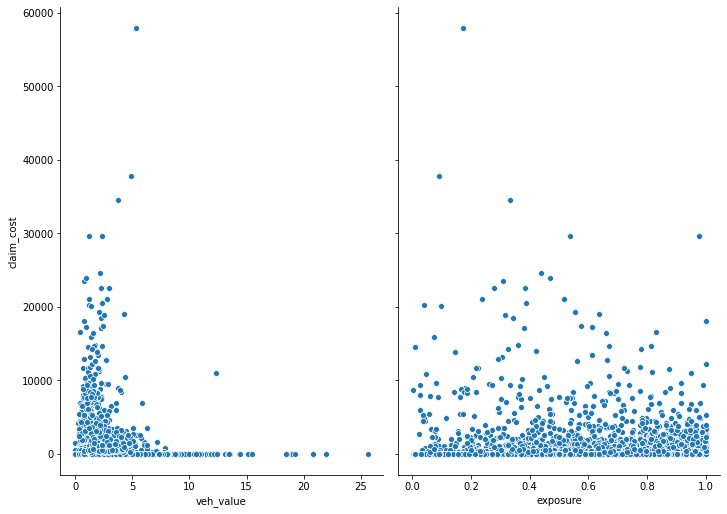

In [5]:
sns.pairplot(train,
             x_vars=['veh_value','exposure'],
             y_vars='claim_cost', height=7, aspect=0.7)

In [15]:
# create X matrix, convert to dummy vars to avoid convergence error
X_train = train[['veh_value','exposure','veh_body','veh_age','gender','area','dr_age']]
X_test = val[['veh_value','exposure','veh_body','veh_age','gender','area','dr_age']]
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
y_train = train['claim_cost']
y_test = val['claim_cost']

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=8051)

lm1 = LinearRegression()
lm1.fit(X_train,y_train)

# prediction on test
predictions = lm1.predict(X_test)
predictions

array([176.73767108,  75.34053412, 109.19499314, ...,  85.37712759,
       369.96007985, 124.34206715])

In [16]:
print(Gini(y_test, predictions))

0.24526876669910447


In [9]:
test = pd.read_csv('InsNova_test.csv')
test.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,dr_age
0,1,2.52,0.289392,SEDAN,1,F,A,5
1,2,1.04,0.540060,SEDAN,4,F,A,3
2,7,1.35,0.938813,HBACK,2,F,A,4
3,8,1.15,0.226887,STNWG,4,M,A,6
4,9,1.29,0.657806,MIBUS,4,F,A,4


In [10]:
upl_X_test = test[['veh_value','exposure','veh_body','veh_age','gender','area','dr_age']]
upl_X_test = pd.get_dummies(data=upl_X_test, drop_first=True)
upl_pred = lm1.predict(upl_X_test)

In [11]:
upl_pred

array([ 17.2998056 , 151.58092895, 152.61536095, ..., 220.37535925,
       189.01538095, 396.01728466])

In [12]:
upload = pd.DataFrame(upl_pred, columns=['claim_cost'])
upload.index.name = 'id'
upload.index += 1
upload.to_csv(r'testgroup7_1.csv',index=True)
upload

,claim_cost
id,
1,17.299806
2,151.580929
3,152.615361
4,54.759941
5,175.293946
...,...
22625,171.688561
22626,289.691788
22627,220.375359


In [13]:
'''# Model 2, AIC best fit

# create X matrix, convert to dummy vars to avoid convergence error
X = train[['veh_value','exposure','veh_age','gender','dr_age']]
X = pd.get_dummies(data=X, drop_first=True)
Y = train['claim_cost']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=8051)
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
lm2_int = lm2.intercept_
coeff_parameter = pd.DataFrame(lm2.coef_,X.columns,columns=['Coefficient'])

# prediction on test
predictions = lm2.predict(X_test)
print(predictions)

# export to csv
upl_X_test = test[['veh_value','exposure','veh_age','gender','dr_age']]
upl_X_test = pd.get_dummies(data=upl_X_test, drop_first=True)
upl_pred = lm2.predict(upl_X_test)
upload = pd.DataFrame(upl_pred, columns=['claim_cost'])
upload.index.name = 'id'
upload.index += 1
upload.to_csv(r'testgroup7_2.csv',index=True)
print(Gini(y_test, predictions))'''

"# Model 2, AIC best fit\n\n# create X matrix, convert to dummy vars to avoid convergence error\nX = train[['veh_value','exposure','veh_age','gender','dr_age']]\nX = pd.get_dummies(data=X, drop_first=True)\nY = train['claim_cost']\n\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=8051)\nlm2 = LinearRegression()\nlm2.fit(X_train,y_train)\nlm2_int = lm2.intercept_\ncoeff_parameter = pd.DataFrame(lm2.coef_,X.columns,columns=['Coefficient'])\n\n# prediction on test\npredictions = lm2.predict(X_test)\nprint(predictions)\n\n# export to csv\nupl_X_test = test[['veh_value','exposure','veh_age','gender','dr_age']]\nupl_X_test = pd.get_dummies(data=upl_X_test, drop_first=True)\nupl_pred = lm2.predict(upl_X_test)\nupload = pd.DataFrame(upl_pred, columns=['claim_cost'])\nupload.index.name = 'id'\nupload.index += 1\nupload.to_csv(r'testgroup7_2.csv',index=True)\nprint(Gini(y_test, predictions))"

In [14]:
'''# Model 3, best subset

# create X matrix, convert to dummy vars to avoid convergence error
X = train[['exposure','veh_age','gender','dr_age']]
X = pd.get_dummies(data=X, drop_first=True)
Y = train['claim_cost']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=8051)

lm3 = LinearRegression()
lm3.fit(X_train,y_train)
lm3_int = lm3.intercept_
coeff_parameter = pd.DataFrame(lm3.coef_,X.columns,columns=['Coefficient'])

# prediction on test
predictions = lm3.predict(X_test)
print(predictions)

# export to csv
upl_X_test = test[['exposure','veh_age','gender','dr_age']]
upl_X_test = pd.get_dummies(data=upl_X_test, drop_first=True)
upl_pred = lm3.predict(upl_X_test)
upload = pd.DataFrame(upl_pred, columns=['claim_cost'])
upload.index.name = 'id'
upload.index += 1
upload.to_csv(r'testgroup7_3.csv',index=True)
print(Gini(y_test, predictions))'''

"# Model 3, best subset\n\n# create X matrix, convert to dummy vars to avoid convergence error\nX = train[['exposure','veh_age','gender','dr_age']]\nX = pd.get_dummies(data=X, drop_first=True)\nY = train['claim_cost']\n\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=8051)\n\nlm3 = LinearRegression()\nlm3.fit(X_train,y_train)\nlm3_int = lm3.intercept_\ncoeff_parameter = pd.DataFrame(lm3.coef_,X.columns,columns=['Coefficient'])\n\n# prediction on test\npredictions = lm3.predict(X_test)\nprint(predictions)\n\n# export to csv\nupl_X_test = test[['exposure','veh_age','gender','dr_age']]\nupl_X_test = pd.get_dummies(data=upl_X_test, drop_first=True)\nupl_pred = lm3.predict(upl_X_test)\nupload = pd.DataFrame(upl_pred, columns=['claim_cost'])\nupload.index.name = 'id'\nupload.index += 1\nupload.to_csv(r'testgroup7_3.csv',index=True)\nprint(Gini(y_test, predictions))"

# So that was not promising.

Kaggle scored the basic regression the best. Even when calculating on all of the train data in R, the results were worse than the 60/40 initial split. So linear regression does not look helpful.

Here's my outline of things to do for the day:

-Build logistic model to predict 0, 1 for claim_ind;

-Train a lin reg model on only those with positive claim cost;

-Test predictions on Kaggle and see what sticks.

If this does not all work, try the Tweedie example.


Now, we create a logistic regression model in the separate notebook, Bagging_LogReg.ipynb.